In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
data=pd.read_csv('/home/bultut/Downloads/Data_Science/sales_data.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape

(200, 4)

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Relationship between variables using corr() method.

In [7]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [8]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

<AxesSubplot:>

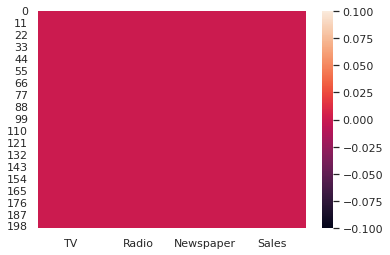

In [24]:
sns.heatmap(data.isnull())

<AxesSubplot:>

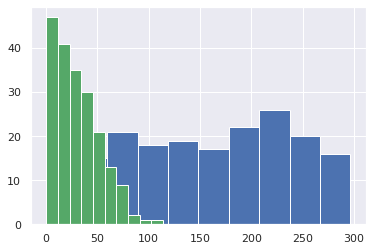

In [9]:
sns.set()
data['TV'].hist()
data['Radio'].hist()
data['Newspaper'].hist()

<AxesSubplot:>

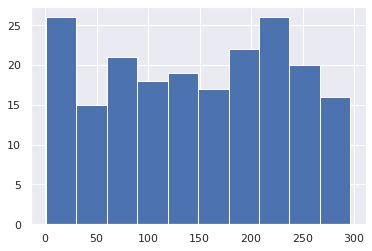

In [10]:
data['TV'].hist()

<AxesSubplot:>

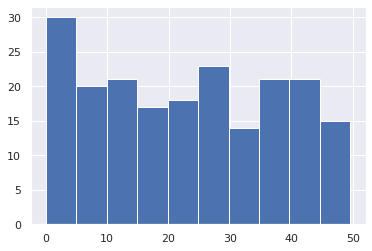

In [11]:
data['Radio'].hist()

<AxesSubplot:>

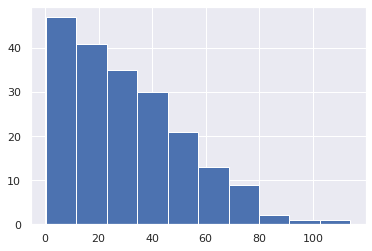

In [12]:
data['Newspaper'].hist()

<AxesSubplot:xlabel='TV', ylabel='Radio'>

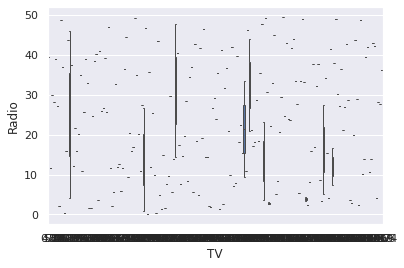

In [14]:
sns.boxplot(x='TV',y='Radio',data=data)

<AxesSubplot:xlabel='Newspaper', ylabel='Radio'>

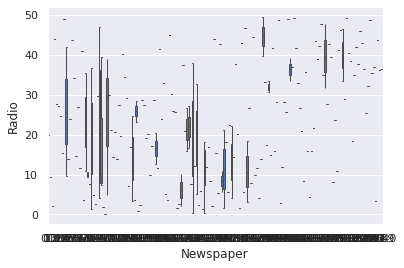

In [15]:
sns.boxplot(x='Newspaper',y='Radio',data=data)

In [16]:
from scipy import stats
stats.mode(data['Radio'])


ModeResult(mode=4.1, count=3)

In [17]:
stats.mode(data['Newspaper'])

ModeResult(mode=8.7, count=3)

In [18]:
stats.mode(data['TV'])

ModeResult(mode=17.2, count=2)

<Figure size 576x360 with 0 Axes>

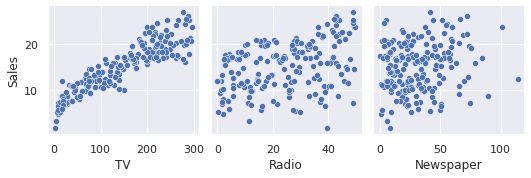

<Figure size 576x360 with 0 Axes>

In [19]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter')
plt.figure(figsize=(8,5))

Using heatmaps to visualize sales data

<AxesSubplot:>

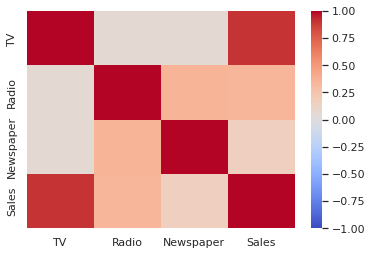

In [20]:
sns.heatmap(data.corr(),vmin=-1,cmap='coolwarm')

<AxesSubplot:>

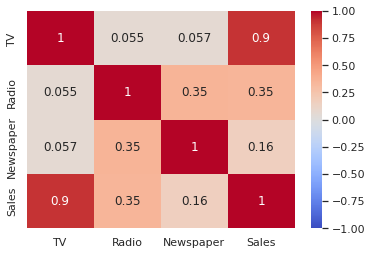

In [21]:
sns.heatmap(data.corr(),vmin=-1,cmap='coolwarm',annot=True)

<AxesSubplot:>

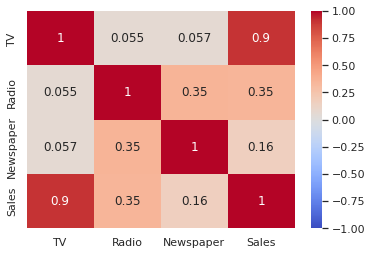

In [22]:
sns.heatmap(data.corr(),vmin=-1,cmap='coolwarm',annot=True,vmax=1)

<AxesSubplot:>

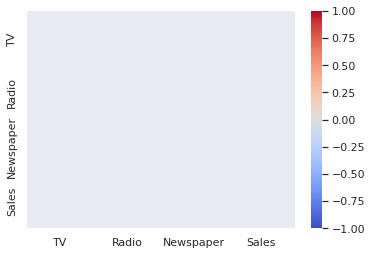

In [23]:
sns.heatmap(data.corr(),vmin=-1,cmap='coolwarm',annot=True,vmax=1,mask=3)

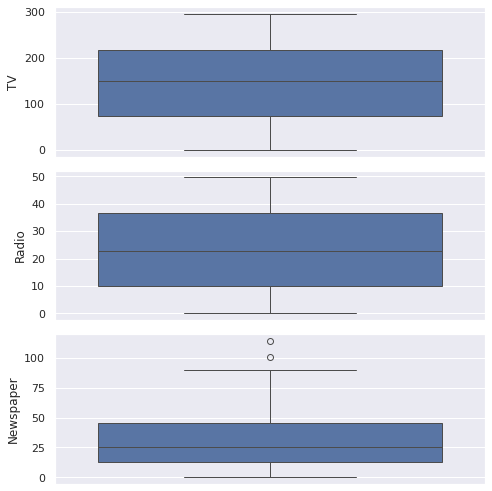

In [25]:
fig,axs=plt.subplots(3, figsize=[7,7])
plt0=sns.boxplot(data['TV'],ax=axs[0])
plt1=sns.boxplot(data['Radio'],ax=axs[1])
plt2=sns.boxplot(data['Newspaper'],ax=axs[2])
plt.tight_layout()

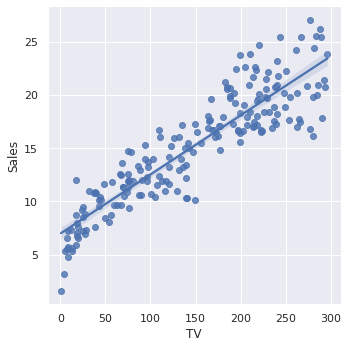

In [26]:
sns.lmplot(x='TV',y='Sales',data=data)
sns.set_style('darkgrid')
sns.set_palette('dark')

Using Pairplots

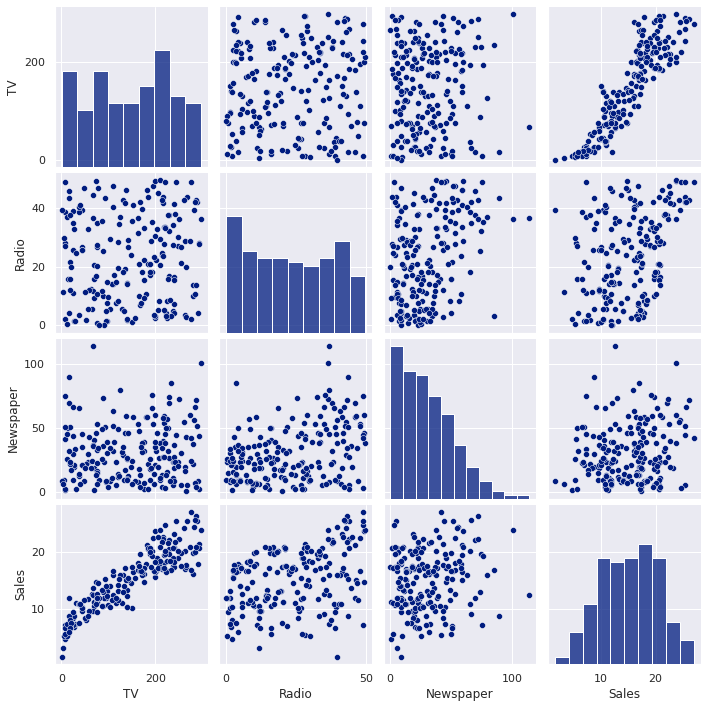

In [27]:
sns.pairplot(data)
sns.set_theme('poster')

In [28]:
X=data[['TV','Radio','Newspaper']]
Y=data['Sales']

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
model=LinearRegression()

In [30]:
model.fit(X_train,Y_train)

LinearRegression()

prediction=model.predict(X_test)
prediction

In [32]:
from sklearn.metrics import r2_score,mean_squared_error

Evaluating performance

In [35]:
mean_sq=mean_squared_error(Y_test,prediction)
mean_sq


2.722866082025966

In [34]:
R_sq=r2_score(Y_test,prediction)
R_sq

0.9031541781049791

Model explains 90.32% of the variance of sales data.

Regression line

<Figure size 576x576 with 0 Axes>

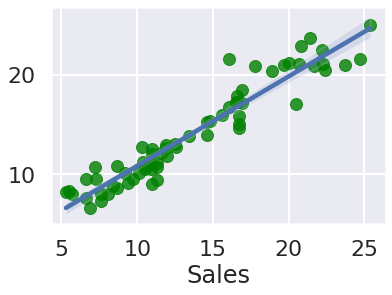

<Figure size 576x576 with 0 Axes>

In [37]:
sns.regplot(x=Y_test,y=prediction,scatter_kws={'color':'green'})
plt.figure(figsize=[8,8])

In [38]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(X_train,Y_train)

RandomForestRegressor()

In [39]:
predict2=random.predict(X_test)
predict2

array([17.392, 22.588, 20.473,  6.162, 22.738, 13.818, 22.659,  9.603,
       17.063, 16.901,  8.477, 10.912, 17.231,  4.302, 11.896, 17.063,
        5.447, 17.803, 12.172, 19.695, 19.692, 13.432, 10.702, 21.367,
       11.147, 10.428, 22.733, 12.269, 11.65 ,  5.133, 16.792, 11.826,
       23.016, 10.027, 20.06 , 19.977, 11.285, 19.41 , 12.817,  7.607,
       12.384, 17.501, 10.106, 10.397, 16.993,  9.602, 11.29 , 13.746,
       12.646, 12.921, 13.987, 17.452,  7.09 ,  5.74 , 12.04 , 12.78 ,
       12.212, 25.152,  7.165, 16.965, 20.175, 19.49 , 12.725,  9.082,
       18.533,  7.025])

In [40]:
Mse=mean_squared_error(Y_test,predict2)
Mse

1.514308727272729

In [41]:
R2_squared=r2_score(Y_test,predict2)
R2_squared

0.9461396672191784

94.61% of the variance is explained in sales data.

<Figure size 576x648 with 0 Axes>

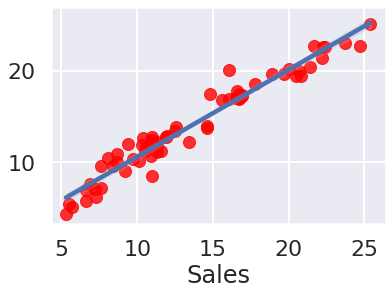

<Figure size 576x648 with 0 Axes>

In [42]:
sns.regplot(x=Y_test,y=predict2,scatter_kws={'color':'red'})
plt.figure(figsize=[8,9])

Import GradientBoostingRegressor

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gradient=GradientBoostingRegressor()
gradient.fit(X_train,Y_train)

GradientBoostingRegressor()

In [44]:
predict3=gradient.predict(X_test)
predict3

array([17.40887894, 23.30912557, 20.27367121,  5.50846715, 23.81416634,
       14.0025421 , 22.43177836,  9.72977121, 17.1097732 , 15.7304998 ,
        7.8384262 , 10.71365395, 17.68027068,  3.1570714 , 11.22141802,
       16.25893671,  4.86224699, 17.47927663, 11.34181623, 19.140532  ,
       19.73477704, 14.56584128, 10.76672135, 22.39946806, 10.91932915,
       10.32438821, 22.46292421, 13.08091033, 11.47253464,  4.88035417,
       16.93927945, 12.04197371, 23.26925348, 11.77651682, 19.7326095 ,
       20.37591724, 10.93876889, 19.74409993, 13.02986774,  8.35813371,
       12.89265476, 17.18375179,  9.46231319, 10.16089333, 16.79943904,
        9.87269388, 11.55473797, 12.33364225, 12.02643153, 13.61505277,
       13.66350666, 16.83777954,  9.55023422,  5.26763544, 11.63333636,
       12.45740996, 11.97075842, 25.62923728,  7.57493286, 17.36873884,
       20.90258889, 19.81169109, 12.8150068 ,  9.28507902, 18.63017964,
        7.55108406])

In [45]:
MSE=mean_squared_error(Y_test,predict3)
MSE

1.836389925133232

In [46]:
r22_square=r2_score(Y_test,predict3)
r22_square

0.934684010795369

93.47% of the variance is explained in sales data

<Figure size 504x432 with 0 Axes>

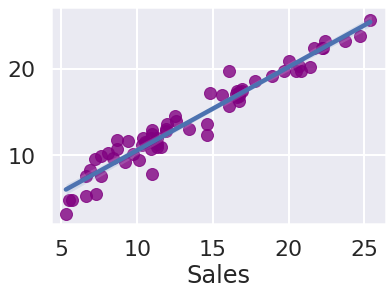

<Figure size 504x432 with 0 Axes>

In [47]:
sns.regplot(x=Y_test,y=predict3,scatter_kws={'color':'purple'})
plt.figure(figsize=[7,6])

The lower the mean square error and the higher the r2 score, the better the model.

Therefore, RandomForestRegressor is the best because it outperforms the rest of the models